In [1]:
import pandas as pd

df_students = pd.read_csv("C:/Users/ROBERT/datasets/mslearn_intro_to_ml_data_grades.csv", delimiter = ',', header = 'infer')

# Remove any rows with missing data
df_students = df_students.dropna(axis=0, how='any')

# calculate who passed, assuming '60' is the grade needed to pass
passes = pd.Series(df_students['Grade'] >= 60)

# Save who passes to the Pandas dataframe
df_students = pd.concat([df_students, passes.rename("Pass")], axis=1)

# Print the result
df_students

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


## Visualizing data with Matplotlib

### Implicit creation of a visualization

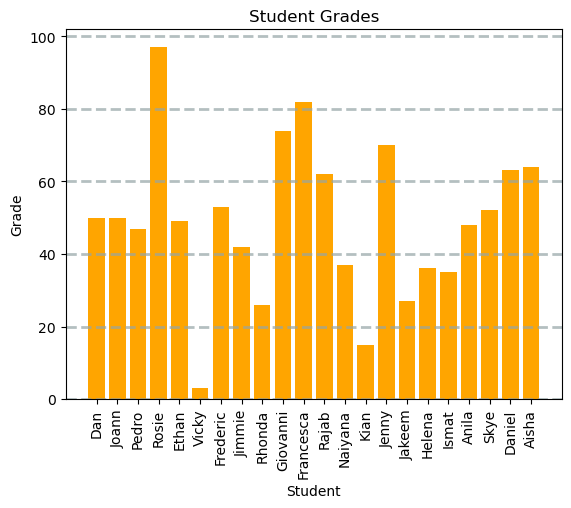

In [2]:
# Ensure plots are displayed inline in the notebook
%matplotlib inline

from matplotlib import pyplot as plt

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

# chart customization
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Display the plot
plt.show()

### Explicit creation of a visualization

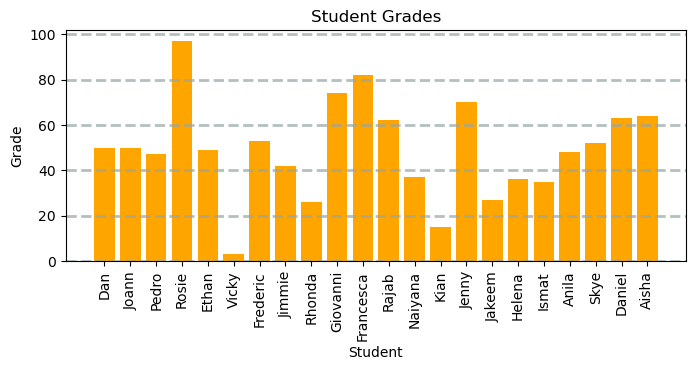

In [3]:
# Create a Figure with a specific size
fig = plt.figure(figsize=(8, 3))

# Create a bar plot of name vs grade
plt.bar(x=df_students.Name, height=df_students.Grade, color='orange')

# chart customization
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Display the plot
plt.show()

### Create a figure with multiple subplots

C:\Users\ROBERT\AppData\Local\Temp\ipykernel_17268\704505006.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df_students.Name, rotation=90)


<bound method Figure.show of <Figure size 1000x400 with 2 Axes>>

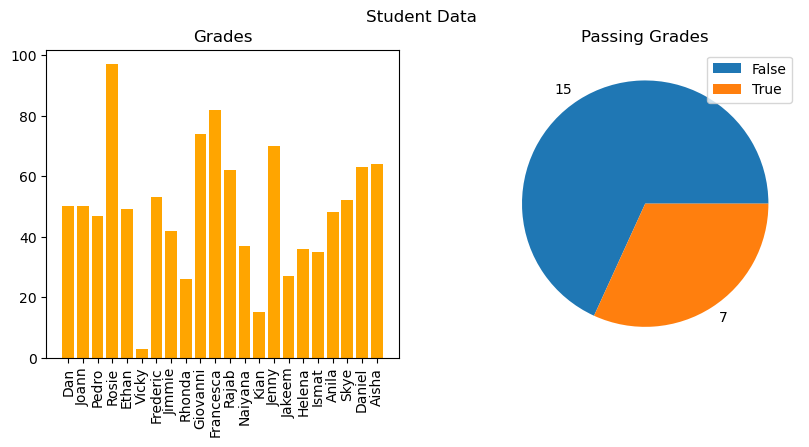

In [4]:
# Create a figure for 2 subplots (1row, 2columns)
fig, ax = plt.subplots(1, 2, figsize = (10, 4))

# Create a bar plot of name vs grade on the first axis
ax[0].bar(x=df_students.Name, height=df_students.Grade, color='orange')
ax[0].set_title('Grades')
ax[0].set_xticklabels(df_students.Name, rotation=90)

# create a pie chart of pass counts on the second axis
pass_counts = df_students['Pass'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.keys().tolist())

# Add a title to the figure
fig.suptitle('Student Data')

# Show the figure
fig.show

<Axes: xlabel='Name'>

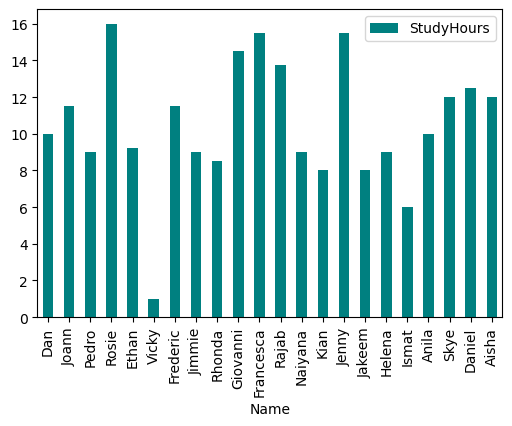

In [5]:
#### Plotting using Dataframe methods
df_students.plot.bar(x='Name', y='StudyHours', color='teal', figsize=(6,4))

## Statistical Analysis

## Descriptive statistics and data distribution

C:\Users\ROBERT\AppData\Local\Temp\ipykernel_17268\3255753400.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


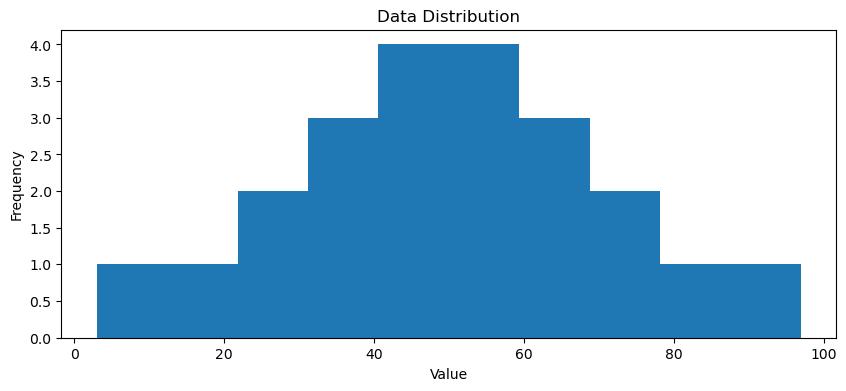

In [6]:
var_data = df_students['Grade']

# Creat a figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var_data)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

fig.show()

#### The histogram above is a symmetric shape, where the most frequently occuring grades tend to be in the middle of the range (around 50), with fewer grades at the extreme ends of the scale.

### Measures of central tendency

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\ROBERT\AppData\Local\Temp\ipykernel_17268\3870528272.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


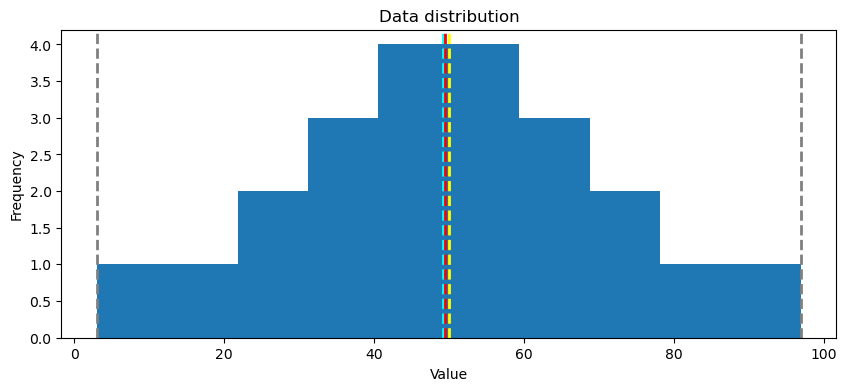

In [7]:
## Get the variable to examine
var = df_students['Grade']

# Get statistics
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(
min_val, mean_val, med_val, mod_val, max_val))

# Create a figure
fig = plt.figure(figsize=(10, 4))

# Plot a histogram
plt.hist(var)

# Add lines for the statistics
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth=2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth=2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth=2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth=2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth=2)

# Add titles and labels
plt.title('Data distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

fig.show()



#### Visualizing the distribution of grades using a *box* plot

C:\Users\ROBERT\AppData\Local\Temp\ipykernel_17268\4251794808.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


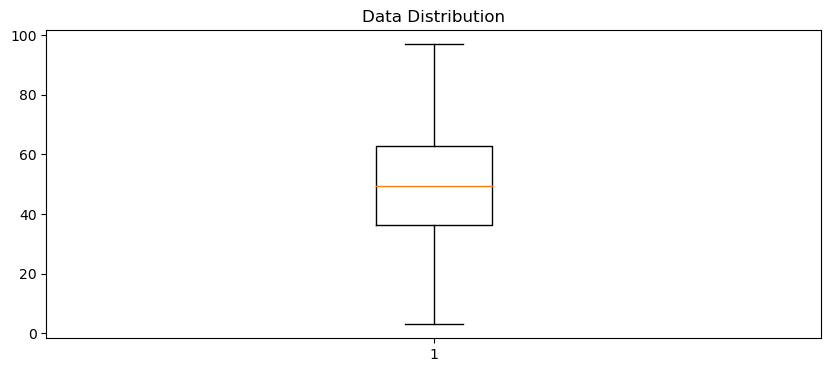

In [8]:
# Get variable to examine
var = df_students['Grade']

# Create a figure
fig = plt.figure(figsize=(10, 4))

# Plot a box plot
plt.boxplot(var)

# Add titles and labels
plt.title('Data Distribution')

fig.show()



#### The box part of the plot shows where the inner two quartiles of the data reside. In this case, half of the grades are between 36 and 63. The *whiskers* extending from the box show the outer two quartiles, so the other half of the grades in this case are between 0 ant 36 or 63 and 100. The line in the box indicates the *median* value.

### Combining the histogram and box plot

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\ROBERT\AppData\Local\Temp\ipykernel_17268\1372660836.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


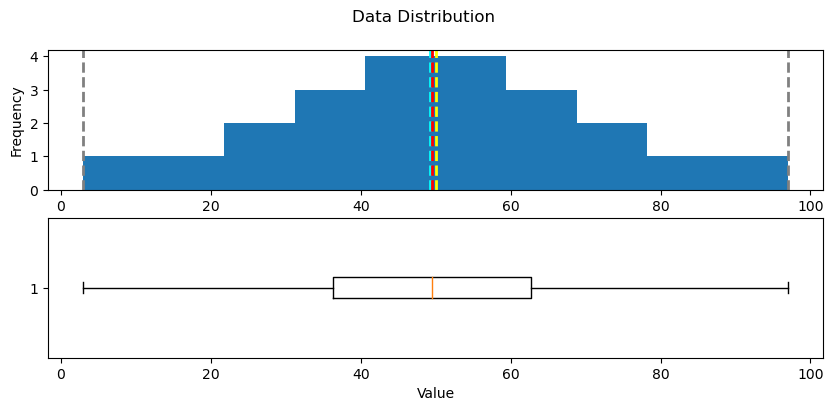

In [9]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt
    
    # Get statistics
    min_val = var.min()
    max_val = var.max()
    mean_val = var.mean()
    med_val = var.median()
    mod_val = var.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(
    min_val, mean_val, med_val, mod_val, max_val))
    
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10, 4))
    
    # Plot the histogram
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')
    
    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth=2)
    
    # Plot the boxplot
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')
    
    # Add a title to the figure
    fig.suptitle('Data Distribution')
    
    fig.show()
    
# Get the variable to examine
col = df_students['Grade']
# Call the function
show_distribution(col)
    
    

#### From the plots above it is evident that all the measurements of central tendency are right in the middle of the data distribution, which is symmetric with values becoming progressively low in both directions from the middle.

#### If we have enough samples, we can calculate something called a *probability density function* which estimates the distribution of grades for the full population.
#### The <strong>pyplot</strong> class from Matplotlib provides a helpful plot function to show this density.

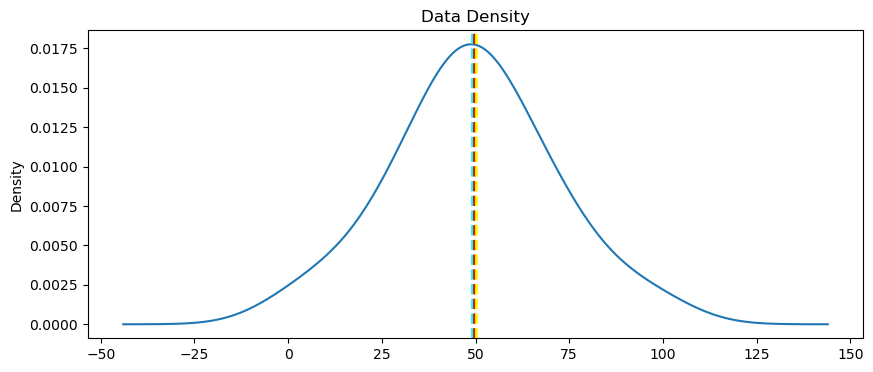

In [10]:
def show_density(var_data):
    from matplotlib import pyplot as plt
    
    fig = plt.figure(figsize=(10,4))
    
    #Plot density
    var_data.plot.density()
    
    # Add titles and labels
    plt.title('Data Density')
    
    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth=2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth=2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth=2)
    
    # Show the figure
    plt.show()

# Get the density of Grade (function call)
col = df_students['Grade']
show_density(col)


#### The density shows the characteristic "bell curve" of what is called a *normal* distribution with the mean and mode at the center and symmetric tails.

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\ROBERT\AppData\Local\Temp\ipykernel_17268\1372660836.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


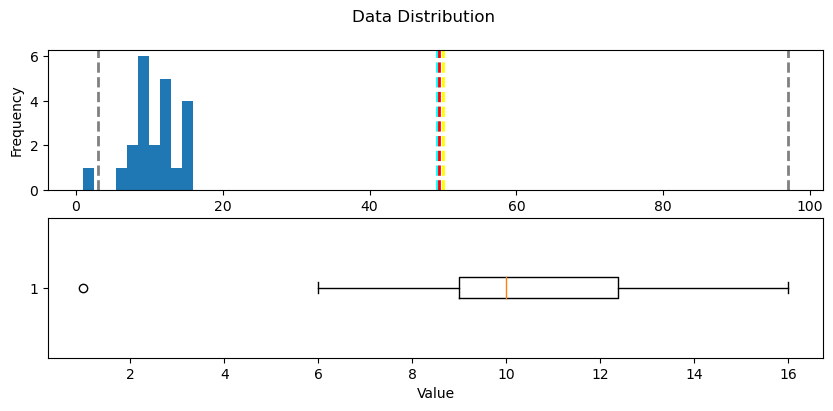

In [11]:
# Get the variable to examine
col = df_students["StudyHours"]
# Call the function
show_distribution(col)

###### There is an outlier that is marked to the leftmost side of the box plot. This is a value that lies significantly outside the range of the rest of the distribution.

###### The following shows the distribution without the outlier

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\ROBERT\AppData\Local\Temp\ipykernel_17268\1372660836.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


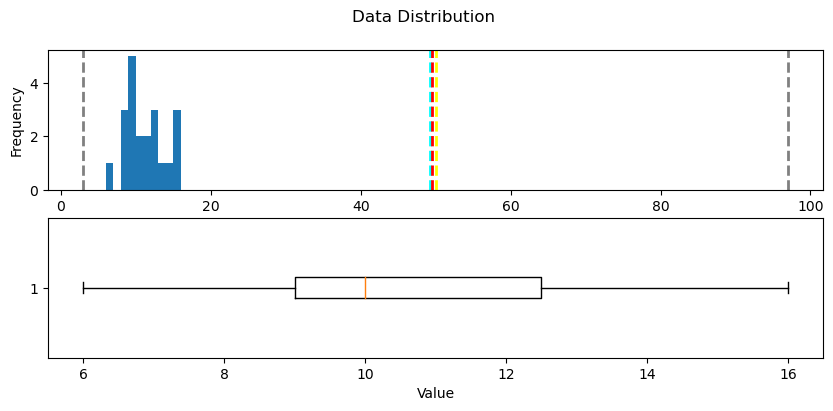

In [12]:
# Get the variable to examine
# We will only get students who have studied more than one hour
col = df_students[df_students.StudyHours>1]['StudyHours']

show_distribution(col)

###### Using the Pandas quantile function to exclude observations below the 0.01th percentile (the value above which 99% of the data resides).

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\ROBERT\AppData\Local\Temp\ipykernel_17268\1372660836.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


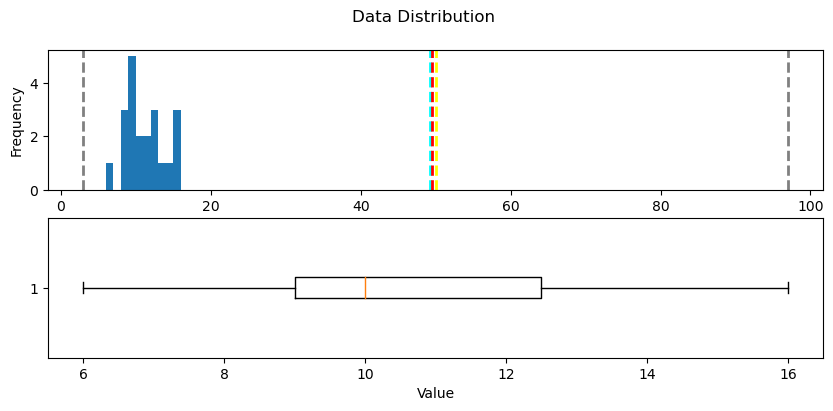

In [13]:
# calculate the 0.01th percentile
q01 = df_students.StudyHours.quantile(0.01)
# Get the variable to examine
col = df_students[df_students.StudyHours>q01]['StudyHours']

show_distribution(col)

###### Excluding observations above the 0.99 percentile

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



C:\Users\ROBERT\AppData\Local\Temp\ipykernel_17268\1372660836.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


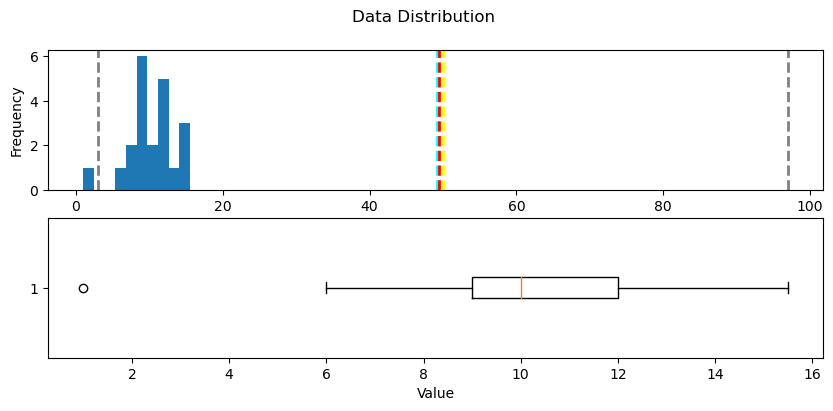

In [15]:
q99 = df_students.StudyHours.quantile(0.99)
# Get the variable to examine
col2 = df_students[df_students.StudyHours<q99]['StudyHours']

show_distribution(col2)

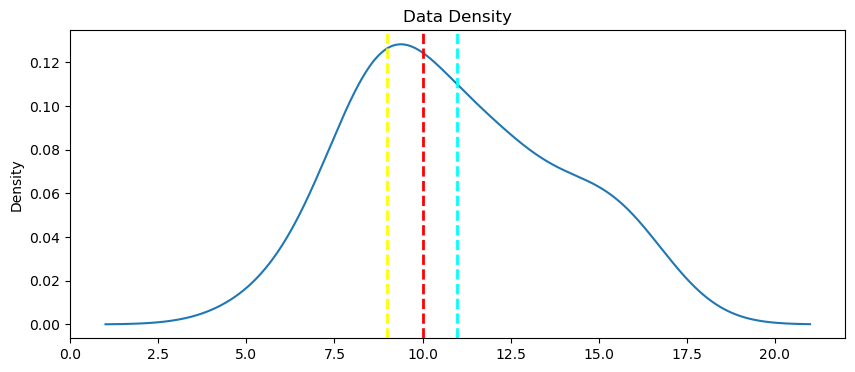

In [17]:
###### Density for this distribution
def show_density(var_data):
    fig = plt.figure(figsize=(10,4))
    
    # Plot density
    var_data.plot.density()
    
    # Add titles and labels
    plt.title('Data Density')
    
    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth=2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth=2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth=2)
    
    plt.show()

# Get the density of StudyHours
show_density(col)
    

###### The above distribution is right skewed, as the mass of data is on the left side of the distribution, creating a long tail to the right because of the values at the extreme high end, which pull the mean to the right.

### Measures of Variance

###### Common statistics that measure variability
###### - Range: Difference between the maximum and minimum
###### - Variance: The average of the squared difference from the mean
###### - Standard Deviation - The square root of the variance

In [18]:
for col_name in ['Grade', 'StudyHours']:
    col = df_students[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


Grade:
 - Range: 94.00
 - Variance: 472.54
 - Std.Dev: 21.74

StudyHours:
 - Range: 15.00
 - Variance: 12.16
 - Std.Dev: 3.49


###### The Standard Deviation provides a measure of variance in the data on the same scale as the data itself. The higher the standard deviation, the more variance there is when comparing values in the distribution to the distribution mean i.e. the data is more spread out.

<b> The following shows the relationship between standard deviations and the data in the normal distribution. </b>

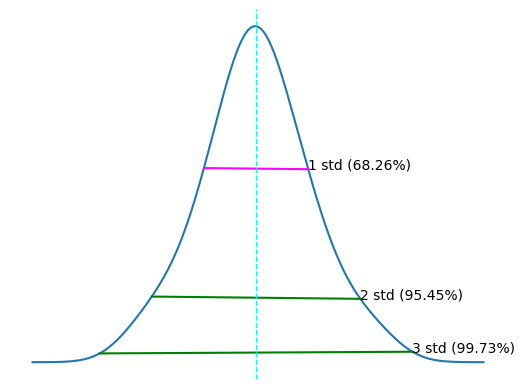

In [20]:
import scipy.stats as stats

# Get the Grade columnn
col = df_students['Grade']

# get the density
density = stats.gaussian_kde(col)

# Plot the density
col.plot.density()

# Get the mean and standard deviation
s = col.std()
m = col.mean()

# Annotate 1 stdev
x1 = [m-s, m+s]
y1 = density(x1)
plt.plot(x1, y1, color='magenta')
plt.annotate('1 std (68.26%)', (x1[1], y1[1]))

# Annotate 2 stdevs
x2 = [m-(s*2), m+(s*2)]
y2 = density(x2)
plt.plot(x2, y2, color='green')
plt.annotate('2 std (95.45%)', (x2[1], y2[1]))

# Annotate 3 stdevs
x3 = [m-(s*3), m+(s*3)]
y3 = density(x3)
plt.plot(x3, y3, color='green')
plt.annotate('3 std (99.73%)', (x3[1], y3[1]))

# Show the location of the mean
plt.axvline(col.mean(), color='cyan', linestyle='dashed', linewidth=1)

plt.axis('off')

plt.show()


<b>The horizontal lines show the percentage of data within one, two and three standard deviations of the mean</b>

<b>Using the describe method to return the main descriptive statistics for all numeric columns</b>

In [21]:
df_students.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000
